In [3]:
import numpy as np
import matplotlib.pyplot as plt


def display_plot(plt):
    plt.legend()
    plt.grid()
    plt.show()
    plt.close()

### Kernel Density Estimates

Kernel Density Estimation (KDE) is a non-parametric method for estimating the probability density function (PDF) of a random variable. It provides a smooth approximation of the underlying data distribution without assuming a specific parametric form.

The kernel density estimator is given by:

$$
\hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)
$$

Where:
- $ K $ is the **kernel function**, which assigns weights and shapes the estimate.
- $ h $ is the **bandwidth**, a smoothing parameter controlling the influence of each data point.
- $ x_i $ are the observed data points.
- $ x $ is the location at which the density is being estimated.

#### Properties of the Kernel Function

A kernel $ K: \mathbb{R} \to \mathbb{R} $ must satisfy the following conditions:
1. $ K(u) \geq 0 $ and $ \int_{-\infty}^{\infty} K(u) \, du = 1 $ (i.e., $ K $ is a probability density).
2. $ K $ is symmetric about zero: $ K(u) = K(-u) $.
3. $ K(u) = 0 $ for $ |u| > 1 $ (compact support).

#### Common Kernels

- **Epanechnikov Kernel**:
  $$
  K(u) = \frac{3}{4}(1 - u^2), \quad \text{for } -1 \leq u \leq 1
  $$

- **Triweight Kernel**:
  $$
  K(u) = \frac{35}{32}(1 - u^2)^3, \quad \text{for } -1 \leq u \leq 1
  $$

#### Construction of the Kernel Density Estimate

Given a sample $ x_1, x_2, \ldots, x_n $, the kernel density estimate at a point $ t $ is:

$$
f_{n,h}(t) = \frac{1}{n} \left\{ \frac{1}{h} K\left( \frac{t - x_1}{h} \right) + \frac{1}{h} K\left( \frac{t - x_2}{h} \right) + \cdots + \frac{1}{h} K\left( \frac{t - x_n}{h} \right) \right\}
$$

or, more compactly:

$$
f_{n,h}(t) = \frac{1}{n h} \sum_{i=1}^{n} K\left( \frac{t - x_i}{h} \right)
$$

This method assigns greater weight to observations $ x_i $ that are closer to the target point $ t $. In contrast, a histogram simply counts how many points fall into a bin containing $ t $.

Because the kernel $ K $ is a probability density function, the KDE  $ f_{n,h} $ also satisfies the properties of a PDF:
- $ f_{n,h}(t) \geq 0 $
- $ \int_{-\infty}^{\infty} f_{n,h}(t) \, dt = 1 $


In [10]:
def epanechnikov_kernel(u):
    return (3/4) * (1 - u**2) * (np.abs(u) <= 1)
def triweight_kernel(u):
    return (35/32) * (1 - u**2)**3 * (np.abs(u) <= 1)

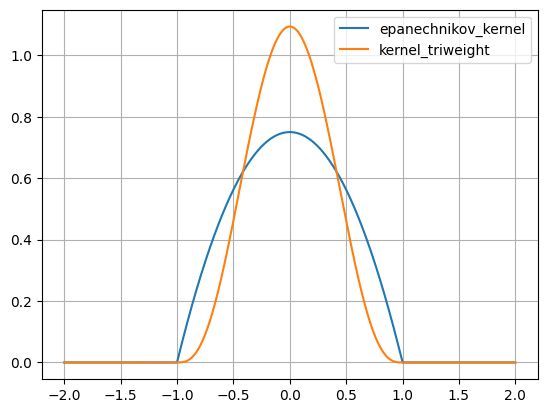

In [11]:
n = [i * 0.001 for i in range(-2000,2000)]
xpoints = np.array(n)
kernel_epanechnikov = np.array([epanechnikov_kernel(x) for x in n])
kernel_triweight = np.array([triweight_kernel(x) for x in n])


plt.plot(xpoints, kernel_epanechnikov, label= 'epanechnikov_kernel')
plt.plot(xpoints, kernel_triweight, label= 'kernel_triweight')
display_plot(plt)

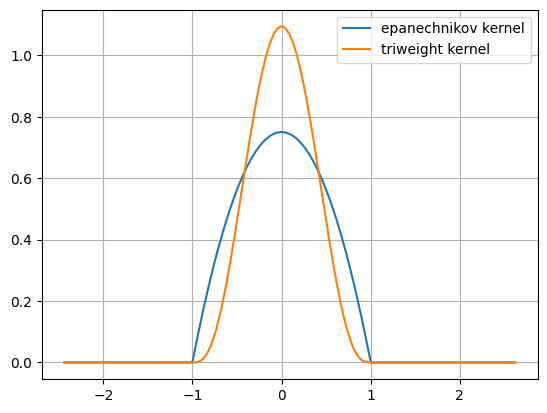

In [33]:
mu = 0
sigma = 1
n  = np.random.normal(mu, sigma, 200)
n.sort()
xpoints = np.array(n)
kernel_epanechnikov = np.array([epanechnikov_kernel(x) for x in n])
kernel_triweight = np.array([triweight_kernel(x) for x in n])

plt.close('all')  
plt.plot(xpoints, kernel_epanechnikov, label= 'epanechnikov kernel')
plt.plot(xpoints, kernel_triweight, label= 'triweight kernel')
display_plot(plt)

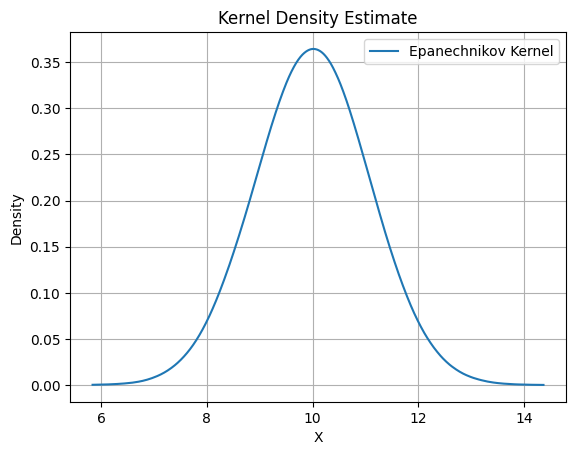


 First 5 Data points:
 [5.83693516 5.87498069 6.13174144 6.20206926 6.24986344]


In [53]:
mu = 10
sigma = 1
n  = np.random.normal(mu, sigma, 30000)
n.sort()
h = 1

kernel_values = np.zeros_like(n)


for i, x in enumerate(n):
    
    u = np.abs(x - n) / h
    kernel_values[i] = np.sum(epanechnikov_kernel(u)) / (len(n) * h)


plt.plot(n, kernel_values, label="Epanechnikov Kernel")
plt.title("Kernel Density Estimate")
plt.xlabel("X")
plt.ylabel("Density")
display_plot(plt)
print('\n First 5 Data points:\n', n[:5])

<br>

<h3>Calculating the Pth Empirical Quantile</h3> <br>

1. Sort the dataset $X$ in ascending order.

2. Calculate the Quantile Index as $k = (p/100) \cdot n $.  This index represents the position in the sorted dataset where the $p$-th quantile is located.

3. Retrieve the Quantile Value: If $k$ is an integer, then the $p$-th quantile is simply the $k$-th value in the sorted dataset. If $k$ is not an integer, you can interpolate between the values at positions $\lfloor k \rfloor$ and $\lceil k \rceil$ using linear interpolation or other interpolation methods.

<h3>Interquartile Range (IQR) </h3>
The Interquartile Range (IQR) is a measure of statistical dispersion and is defined as the range between the 25th percentile (Q1) and the 75th percentile (Q3) of a dataset.

In [56]:
def five_number_summary(data):
    summary_result = {
    'minimum': np.percentile(data, 0),
    '25th': np.percentile(data, 25),
    'median': np.percentile(data, 50),
    '75th': np.percentile(data, 75),
    'maximum': np.percentile(data, 100)
    }
    return summary_result

def interquartile_range(data):
    summary_result = five_number_summary(data)
    IQR = summary_result['75th'] - summary_result['25th']
    return IQR

In [57]:
dataSet = np.array([2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 20])
dataSet.sort()

print(five_number_summary(dataSet))
print(interquartile_range(dataSet))

{'minimum': 2.0, '25th': 6.0, 'median': 11.0, '75th': 16.0, 'maximum': 20.0}
10.0


### The Box-and-Whisker Plot

A **box-and-whisker plot** (commonly known as a **boxplot**) is a graphical representation of the five-number summary of a dataset: minimum, lower quartile (Q1), median, upper quartile (Q3), and maximum.

- The data values are typically shown on the **vertical axis**, while the horizontal width of the box is not meaningful and is only used for display purposes.
- The **box** spans from the lower quartile (Q1) to the upper quartile (Q3), representing the **interquartile range (IQR)**.
- A **horizontal line inside the box** indicates the **sample median**.
- **Whiskers** extend from the box:
  - Upward to the largest observation within **1.5 × IQR** above Q3.
  - Downward to the smallest observation within **1.5 × IQR** below Q1.
- Any observations beyond the whiskers are treated as **outliers** and are typically marked with a small circle (∘).

> **Note:** The position of the median inside the box may hint at skewness in the dataset.

While boxplots are concise and effective for comparing multiple datasets side by side, they do not reveal features such as **multiple modes (peaks)** in the data. For more detailed distribution insights, visualizations like **histograms** or **kernel density estimates** are preferred.


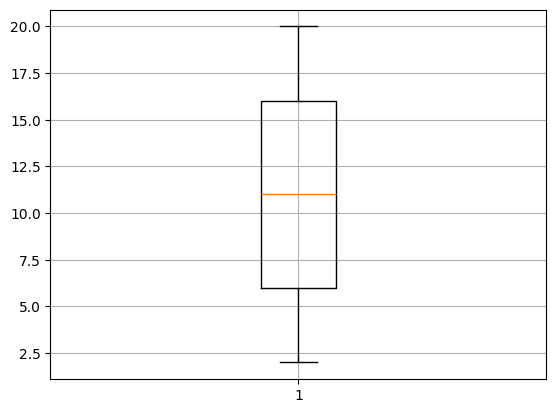

In [59]:
plt.boxplot(dataSet) 
plt.grid()
plt.show()  